In [1]:
from os.path import join
from os import listdir
import numpy as np
datapath = '/home/wenshan/datasets/quickdraw'

filecat = 'sketchrnn_cat.npz'

with np.load(join(datapath, filecat)) as cat_data:
    train_cat, val_cat, test_cat = cat_data['train'], cat_data['valid'], cat_data['test']


In [34]:
#train_cat.shape, test_cat.shape, val_cat.shape
#type(train_cat[0]),train_cat[0].shape, train_cat[0]
from utils import strokes_to_lines
cat0 = strokes_to_lines(train_cat[1])
print len(cat0), len(cat0[0]), len(cat0[0][0]),cat0[0]

4 17 2 [[-8.0, -41.0], [-30.0, -92.0], [-13.0, -78.0], [36.0, -21.0], [113.0, -38.0], [147.0, -38.0], [163.0, -34.0], [178.0, -62.0], [202.0, -89.0], [227.0, -111.0], [253.0, -128.0], [236.0, -87.0], [227.0, -46.0], [234.0, 11.0], [231.0, 95.0], [217.0, 121.0], [186.0, 143.0]]


In [40]:
import matplotlib.pyplot as plt
from utils import strokes_to_lines

def drawFig(stroke):
    lines = strokes_to_lines(stroke)
    for line in lines:
        line_np = np.array(line)
    #     print cat0_np.shape, cat0_np, cat0_np[:,0], cat0_np[:,1]
        plt.plot(line_np[:,0],0-line_np[:,1])
    plt.show()

In [46]:
from utils import DataLoader
dataloader = DataLoader(train_cat)
dataloader.normalize()
#print dataloader.random_sample()

total images <= max_seq_len is 70000


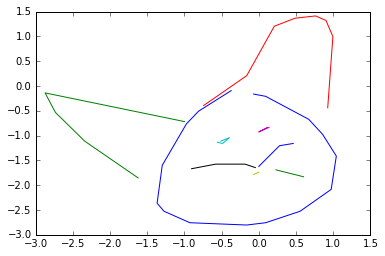

[[-0.3706263   0.09265658  0.        ]
 [-0.44011873  0.41695458  0.        ]
 [-0.162149    0.25480556  0.        ]
 [-0.32429799  0.83390915  0.        ]
 [-0.06949243  0.76441675  0.        ]
 [ 0.09265658  0.162149    0.        ]
 [ 0.34746215  0.23164143  0.        ]
 [ 0.76441675  0.04632829  0.        ]
 [ 0.25480556 -0.04632829  0.        ]
 [ 0.46328285 -0.23164143  0.        ]
 [ 0.41695458 -0.44011873  0.        ]
 [ 0.06949243 -0.67176014  0.        ]
 [-0.18531315 -0.44011873  0.        ]
 [-0.18531315 -0.30113387  0.        ]
 [-0.57910359 -0.46328285  0.        ]
 [-0.162149   -0.04632829  1.        ]
 [-1.55199754  1.69098246  0.        ]
 [-0.71808845 -0.7412526   0.        ]
 [-0.39379042 -0.57910359  0.        ]
 [-0.13898486 -0.39379042  0.        ]
 [ 1.87629557  0.57910359  1.        ]
 [ 0.25480556 -0.32429799  0.        ]
 [ 0.57910359 -0.60226774  0.        ]
 [ 0.3706263  -0.99605817  0.        ]
 [ 0.27796972 -0.162149    0.        ]
 [ 0.27796972 -0.04632829

In [114]:
sample = dataloader.random_sample()
drawFig(sample)
print sample

In [120]:
sampleacc = np.copy(sample)
sampleacc [0,:] = [0,0,0]
sampleacc[1:,0:2] = sample[1:,0:2] - sample[0:-1,0:2]
# sampleacc[:,2] = sample[:,2]
print sampleacc

[[ 0.          0.          0.        ]
 [-0.06949243  0.32429799  0.        ]
 [ 0.27796972 -0.16214901  0.        ]
 [-0.162149    0.57910359  0.        ]
 [ 0.25480556 -0.0694924   0.        ]
 [ 0.16214901 -0.60226774  0.        ]
 [ 0.25480556  0.06949243  0.        ]
 [ 0.41695461 -0.18531314  0.        ]
 [-0.50961119 -0.09265658  0.        ]
 [ 0.20847729 -0.18531314  0.        ]
 [-0.04632828 -0.2084773   0.        ]
 [-0.34746215 -0.23164141  0.        ]
 [-0.25480556  0.23164141  0.        ]
 [ 0.          0.13898486  0.        ]
 [-0.39379042 -0.16214898  0.        ]
 [ 0.41695458  0.41695458  1.        ]
 [-1.38984859  1.73731077  0.        ]
 [ 0.83390909 -2.432235    0.        ]
 [ 0.32429802  0.16214901  0.        ]
 [ 0.25480556  0.18531317  0.        ]
 [ 2.01528049  0.97289401  1.        ]
 [-1.62149    -0.90340161  0.        ]
 [ 0.32429802 -0.27796975  0.        ]
 [-0.20847729 -0.39379042  0.        ]
 [-0.09265658  0.83390915  0.        ]
 [ 0.          0.11582071

In [1]:
import torch 
import torch.nn as nn

rnn = nn.LSTM(10,20,2) # input, hidden, layers
input = torch.randn(5, 3, 10) # seq, batch, input
h0 = torch.randn(2, 3, 20) # layers, batch, hidden
c0 = torch.randn(2, 3, 20) 
output, hn = rnn(input, (h0, c0))

In [2]:
print output.size()
print type(hn), hn[0].size(), hn[1].size()
torch.cat((hn[0][:,1:,:],hn[1][:,1:,:]),dim=1).size()

torch.Size([5, 3, 20])
<type 'tuple'> torch.Size([2, 3, 20]) torch.Size([2, 3, 20])


torch.Size([2, 4, 20])

In [11]:
x=torch.randn(3,20)
xx = x.expand((4,3,20))
print xx.size()
print x
xxx = xx.view(4,6,-1)
print xxx.size()

torch.Size([4, 3, 20])
tensor([[-0.9177,  0.8113,  0.2569,  1.2606, -0.6390, -0.4724,  0.6521,
          1.3955, -0.5262,  0.8308, -1.1170,  1.0073, -0.0636,  0.6234,
          0.3700,  1.6156, -1.0099, -0.4924,  1.0646, -0.2410],
        [-2.3912, -0.6617,  0.5527,  0.3652,  1.2067, -1.8604, -1.7345,
          0.9816, -0.1232,  0.0880,  0.2423,  0.7619,  0.3339, -0.8341,
          0.2880,  1.5234,  1.6911, -1.0647, -0.9138, -0.7486],
        [ 0.5276, -1.4955,  0.5216,  0.8937,  0.1311, -1.9968, -0.3707,
         -1.0174,  0.9638,  1.6404, -0.1292,  0.1416, -2.3453,  0.1384,
         -2.0993,  0.1473,  0.0516,  0.7583, -1.1088, -0.8619]])
torch.Size([4, 6, 10])
